# Homework 1: Neural Data: Traditional Analysis and Visualizations

## Question 1: Homogeneous Poisson Process
We will consider a simulated neuron that has a cosine tuning curve described in equation (1.15) in Theoretical Neuroscience (TN) by Dayan and Abbott:

$$\lambda(s) = r_0 + (r_{max} - r_0) \cos(s - s_{max})$$

where $\lambda$ is the firing rate (in spikes per second), $s$ is the reaching angle of the arm, $s_{max}$ is the reaching angle associated with the maximum response $r_{max}$, and $r_0$ is an offset that shifts the tuning curve up from the zero axis. Let $r_0 = 30$, $r_{max} = 50$, and $s_{max}=\pi$.

### Question 1(a): Spike Trains
For each of the following reach angles ($s=k * \pi/4$, where $k=0,1,\dots,7$), generate 100 spike trains according to a homogeneous Poisson process. Each spike train should have a duration of 1 second. Plot 5 spike trains for each reaching angle in the same format as shown in Figure 1.6(A) in TN (in a circle). You can organize the subplots in a circle with matplotlib's `subplots` or `subplot_mosaic` functions.

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

In [5]:
r_0 = 30
r_max = 50
s_max = np.pi

s_vals = np.zeros((len(np.arange(0,8,1))))
fr_vals = np.zeros((len(np.arange(0,8,1))))

for idx, k in enumerate(np.arange(0, 8, 1)):
    s = np.around((k * np.pi/4), 3)
    s_vals[idx] = s
    fr = r_0 + (r_max - r_0)*np.cos(s - s_max)
    fr_vals[idx] = np.around(fr, 3)

print(fr_vals)
print(s_vals)

[10.    15.852 30.004 44.139 50.    44.142 30.008 15.855]
[0.    0.785 1.571 2.356 3.142 3.927 4.712 5.498]


In [6]:
def generate_spike_train(rate, duration):
    num_spikes = np.random.poisson(rate * duration)
    isis = np.random.exponential(1 / rate, num_spikes)
    spike_times = np.cumsum(isis)
    spike_times = spike_times[spike_times < duration]

    return spike_times, isis

In [7]:
fr_values = {}
for sval in s_vals: 
    fr_values[sval] = []

ISI_values = {}
for sval in s_vals: 
    ISI_values[sval] = []

count = 0
for epoch in np.arange(0, 100):
    for idx, sval in enumerate(s_vals):
        val = fr_vals[idx]
        fr_values[sval].append(generate_spike_train(val,1)[0])
        ISI_values[sval].append(generate_spike_train(val,1)[1])

In [8]:
def generate_event_plot(ax, idx_val, train_start, train_end):
    val = s_vals[idx_val]
    events = fr_values[val][train_start:train_end]
    ax.eventplot(events, linewidths= 0.5, color = 'k')
    ax.set_ylim(0.5)

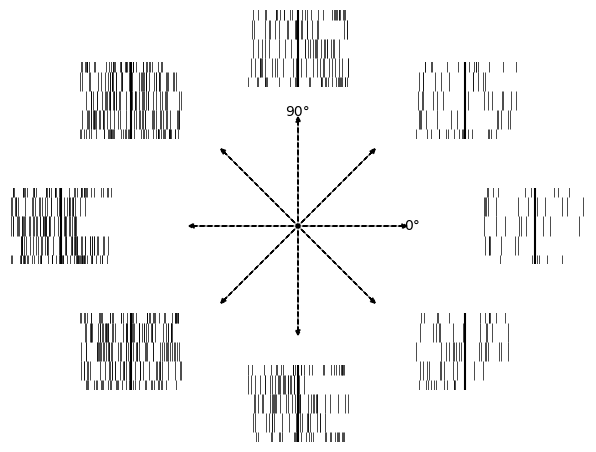

In [9]:
N = 8
t = np.linspace(0, 2*np.pi, N, endpoint=False)
r = 0.37
h = 0.9 - 2 * r
w = 0.9 - 2 * r
X, Y = r*np.cos(t)-w/2.+0.5, r*np.sin(t)-h/2.+0.5
x_ticks = np.arange(0, 1, 0.2)

fig = plt.figure()
axes = []
for x, y in zip(X, Y):
    axes.append(fig.add_axes([x, y, w, h]))

for idx in np.arange(0, 8, 1):
    generate_event_plot(axes[idx], idx, 0, 5)

for ax in axes:  
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_ylim(0, 4)
    ax.set_xlim(0, 1)
    ax.axvline(x=0.50, color = 'k')
    
inner_width = 0.5 
inner_height = 0.5
inner_x = 0.25 
inner_y = 0.25


inner_axes = fig.add_axes([inner_x, inner_y, inner_width, inner_height])


divisions = 8

for i in range(divisions):
    angle = i * 2 * np.pi / divisions
    dx = np.cos(angle)
    dy = np.sin(angle)
    inner_axes.arrow(0, 0, dx, dy, head_width=0.05, head_length=0.05, linestyle='--', color='k')

inner_axes.text(1.1, 0, '0°', ha='center', va='center')
inner_axes.text(0, 1.1, '90°', ha='center', va='center')
inner_axes.set_aspect('equal', adjustable='box')
inner_axes.set_axis_off()

plt.show()

### Question 1(b): Spike Histogram
For each reaching angle, find the spike histogram by taking spike counts in non-overlapping 20 ms bins, then averaging across the 100 trials. Plot the 8 resulting spike histograms around a circle, as in part (a). The spike histograms should have firing rate (in spikes / second) as the vertical axis and time (in ms, not time bin index) as the horizontal axis. You can use numpy's `histogram` function to bin the data and matplotlib's `bar` or `stairs` functions to create the plot.

In [77]:
def spike_histogram(ax, idx_val, train_start, train_end):
    val = s_vals[idx_val]
    sum = np.zeros((5))
    for trial in (fr_values[val][train_start:train_end]):
        for val in trial: 
            if val < 0.2:
                sum[0] += 1
            if 0.2 < val < 0.4:
                sum[1] += 1
            if 0.4 < val < 0.6:
                sum[2] += 1
            if 0.6 < val < 0.8:
                sum[3] += 1
            if 0.8 < val:
                sum[4] += 1
    x = np.arange(0, 1, 0.2)
    y = sum/100
    ax.bar(x, y, width= 0.15, color = 'k')
    ax.set_ylim(0, 15)
    return y

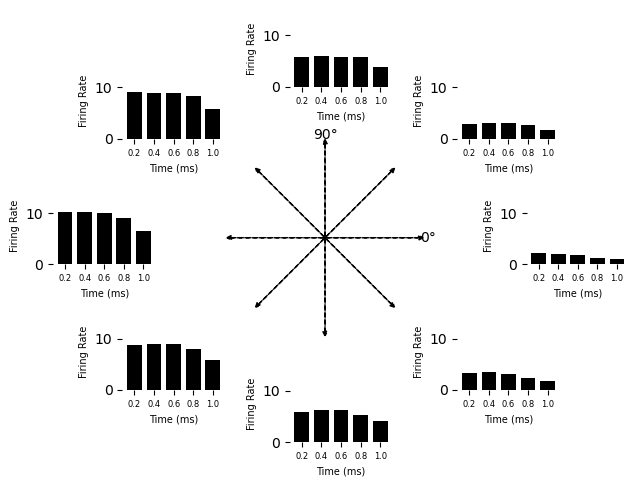

In [78]:
N = 8
t = np.linspace(0, 2*np.pi, N, endpoint=False)
r = 0.37
h = 0.9 - 2 * r
w = 0.9 - 2 * r
X, Y = r*np.cos(t)-w/2.+0.5, r*np.sin(t)-h/2.+0.5
x_ticks = np.arange(0, 1, 0.2)

fig = plt.figure()
axes = []
for x, y in zip(X, Y):
    axes.append(fig.add_axes([x, y, w, h]))

for idx in np.arange(0, 8, 1):
    spike_histogram(axes[idx], idx, 0, 100)

for ax in axes:  
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xlabel('Time (ms)', fontsize = 7)
    ax.set_ylabel('Firing Rate', fontsize = 7)

    x_tick_positions = [0, 0.2 , 0.4, 0.6, 0.8]
    x_tick_labels = ['0.2', '0.4', '0.6', '0.8', '1.0'] 
    label_sizes = 6  

    ax.set_xticks(x_tick_positions)
    ax.set_xticklabels(x_tick_labels, fontsize=label_sizes)

inner_width = 0.45 
inner_height = 0.45
inner_x = 0.25
inner_y = 0.25

inner_axes = fig.add_axes([inner_x, inner_y, inner_width, inner_height])

divisions = 8

for i in range(divisions):
    angle = i * 2 * np.pi / divisions
    dx = np.cos(angle)
    dy = np.sin(angle)
    inner_axes.arrow(0, 0, dx, dy, head_width=0.05, head_length=0.05, linestyle='--', color='k')

inner_axes.text(1.1, 0, '0°', ha='center', va='center')
inner_axes.text(0, 1.1, '90°', ha='center', va='center')
inner_axes.set_aspect('equal', adjustable='box')
inner_axes.set_axis_off()

plt.show()

### Question 1(c): Tuning Curve
For each trial, count the number of spikes across the entire trial. Plot these points on the axes shown in Figure 1.6(B) in TN. There should be 800 points in the plot (but some points may be on top of each other due to the discrete nature of spike counts). For each reaching angle, find the mean firing rate across the 100 trials, and plot the mean firing rate using a red point on the same plot. Now, plot the tuning curve of this neuron in green on the same plot.

In [75]:
variances = np.zeros((len(s_vals)))
means = np.zeros((len(s_vals)))
tuning_curve = {}
true_s_vals = np.zeros((len(s_vals)))

for s_idx, val in enumerate(s_vals):
    print(val)
    tuning_curve[val] = []
    tuning_curve_vals = np.zeros((100))

    for idx, epoch in enumerate(fr_values[val]):
        tuning_curve_vals[idx] = len(epoch)

    tuning_curve[val].append(tuning_curve_vals)

    mean = np.mean(tuning_curve[val])
    variance = np.var(tuning_curve[val])

    means[s_idx] = mean
    variances[s_idx] = variance
    true_s_vals[s_idx] = np.around(r_0 + (r_max - r_0)*np.cos(val - s_max), 3)

tester = ((tuning_curve[0]))

print(means)
print(true_s_vals)

0.0
0.785
1.571
2.356
3.142
3.927
4.712
5.498
[ 8.07 13.39 26.93 40.93 45.78 40.41 27.43 13.93]
[10.    15.852 30.004 44.139 50.    44.142 30.008 15.855]


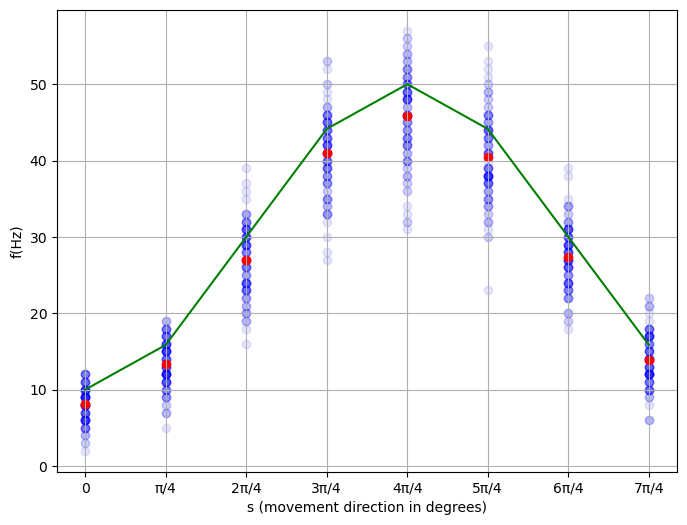

In [79]:
plt.figure(figsize=(8, 6))
for idx in np.arange(0, 8, 1):
    data = tuning_curve[s_vals[idx]]
    y_data = np.full(100, s_vals[idx])
    plt.scatter(y_data, data, color = 'blue', alpha = 0.1)

plt.scatter(s_vals, means, color = 'r')

plt.plot(s_vals, true_s_vals, color = 'g')

x_labels = ['0', 'π/4', '2π/4', '3π/4', '4π/4', '5π/4', '6π/4', '7π/4']
plt.xticks(s_vals, x_labels)
plt.xlabel('s (movement direction in degrees)')
plt.ylabel('f(Hz)')
# plt.legend()
plt.grid(True)
plt.show()

Do the mean firing rates lie near the tuning curve?

*Answer: Yes, the mean firing rates do lie near the tuning curve, and when they do not, they fall consistently below the curve at approximately the same frequency*

### Question 1(d): Count Distribution
For each reaching angle, plot the *normalized* distribution (i.e., normalized so that the area under the distribution equals one) of spike counts (using the same counts from part (c)). Plot the 8 distributions around a circle, as in part (a). Fit a Poisson distribution to each empirical distribution (using maximum likelihood estimation) and plot it on top of the corresponding empirical distribution.

In [82]:
def normalized_fr_data(ax, s_idx_val):
    spike_counts = tuning_curve[s_vals[s_idx_val]]  
    # mean_sc = 
    hist, bins = np.histogram(spike_counts, bins=100, density=True)  
    bin_width = bins[1] - bins[0]
    hist_normalized = hist / (np.sum(hist) * bin_width)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    x = np.arange(0, 100, 1)

    y = poisson.pmf(x, mu = means[s_idx_val])
    ax.plot(x, y)

    # Mu = np.mean(data) (new line) rv = poisson(mu)

    ax.bar(bin_centers, hist_normalized, label='Normalized distribution', color='k')

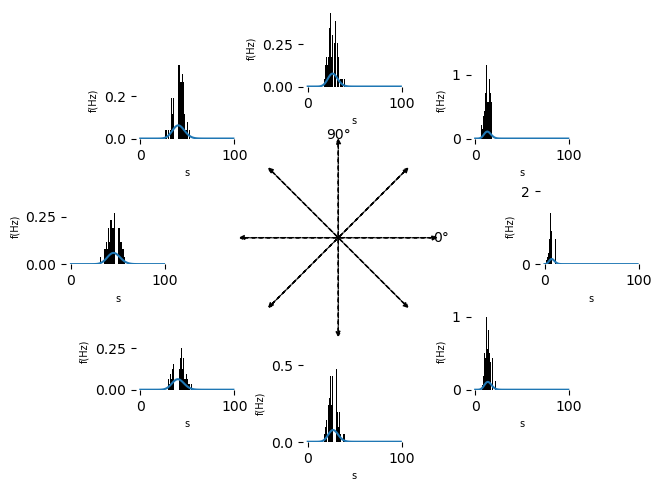

In [83]:
N = 8
t = np.linspace(0, 2*np.pi, N, endpoint=False)
r = 0.37
h = 0.9 - 2 * r
w = 0.9 - 2 * r
X, Y = r*np.cos(t)-w/2.+0.5, r*np.sin(t)-h/2.+0.5
x_ticks = np.arange(0, 1, 0.2)

fig = plt.figure()
axes = []
for x, y in zip(X, Y):
    axes.append(fig.add_axes([x, y, w, h]))

for idx in np.arange(0, 8, 1):
    normalized_fr_data(axes[idx], idx)
    
for ax in axes:  
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xlabel('s', fontsize = 7)
    ax.set_ylabel('f(Hz)', fontsize = 7)

inner_width = 0.45 
inner_height = 0.45
inner_x = 0.25
inner_y = 0.25

inner_axes = fig.add_axes([inner_x, inner_y, inner_width, inner_height])

divisions = 8

for i in range(divisions):
    angle = i * 2 * np.pi / divisions
    dx = np.cos(angle)
    dy = np.sin(angle)
    inner_axes.arrow(0, 0, dx, dy, head_width=0.05, head_length=0.05, linestyle='--', color='k')

inner_axes.text(1.1, 0, '0°', ha='center', va='center')
inner_axes.text(0, 1.1, '90°', ha='center', va='center')
inner_axes.set_aspect('equal', adjustable='box')
inner_axes.set_axis_off()

plt.show()

Are the empirical distributions well-fit by Poisson distributions?

*Answer: While the general shape of the poisson curves matched the pattern from the emperical distributions, the height of the Poisson distributions didn't match the values/ heights that I expected*

### Question 1(e): Fano Factor
For each reaching angle, find the mean and variance of the spike counts across the 100 trials (using the same spike counts from part (c)). Plot the obtained mean and variance on the axes shown in Figure 1.14(A) in TN. There should be 8 points in this plot - one per reaching angle.

Text(0, 0.5, 'variance (spikes^2)')

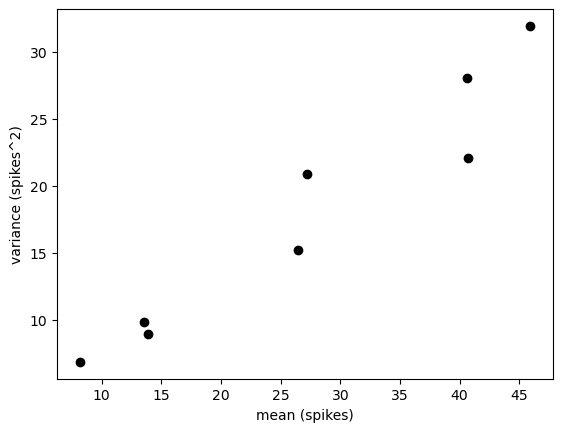

In [186]:
plt.scatter(means, variances, color = 'k')
plt.xlabel('mean (spikes)')
plt.ylabel('variance (spikes^2)')

Do these points lie near the 45 degree diagonal, as would be expected of a Poisson distribution?

*Answer: Yes, these points do lie along the 45 degree diagonal**

### Question 1(f): Interspike Interval (ISI) distribution
For each reaching angle, plot the normalized distribution of ISIs. Plot the 8 distributions around a circle, as in part (a). Fit an exponential distribution to each empirical distribution (with maximum likelihood estimation) and plot it on top of the corresponding empirical distribution. 

In [164]:
def normalized_isi_data(ax, s_idx_val):

    spike_counts = np.concatenate(ISI_values[s_vals[s_idx_val]])
    hist, bins = np.histogram(spike_counts, bins=100, density=True)  
    bin_width = bins[1] - bins[0]
    hist_normalized = hist / (np.sum(hist) * bin_width)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    x = np.arange(0, 100, 1)

    y = poisson.pmf(x, mu = means[s_idx_val])
    ax.plot(x, y)

    ax.bar(bin_centers, hist_normalized, label='Normalized distribution', color='k')

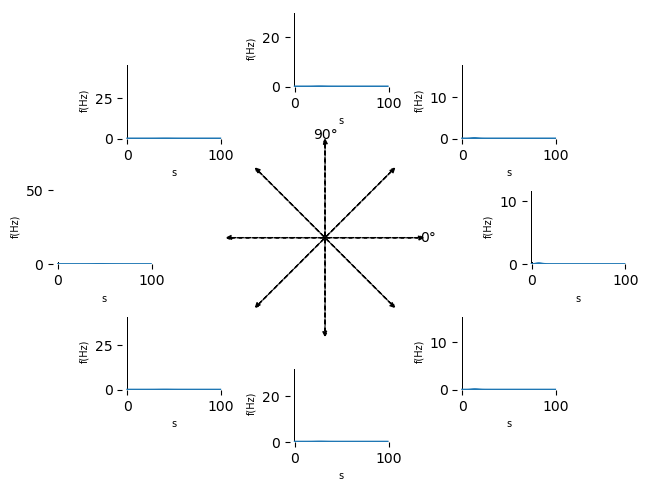

In [167]:
N = 8
t = np.linspace(0, 2*np.pi, N, endpoint=False)
r = 0.37
h = 0.9 - 2 * r
w = 0.9 - 2 * r
X, Y = r*np.cos(t)-w/2.+0.5, r*np.sin(t)-h/2.+0.5
x_ticks = np.arange(0, 1, 0.2)

fig = plt.figure()
axes = []
for x, y in zip(X, Y):
    axes.append(fig.add_axes([x, y, w, h]))

for idx in np.arange(0, 8, 1):
    normalized_isi_data(axes[idx], idx)

for ax in axes:  
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xlabel('s', fontsize = 7)
    ax.set_ylabel('f(Hz)', fontsize = 7)
    

inner_width = 0.45 
inner_height = 0.45
inner_x = 0.25
inner_y = 0.25

inner_axes = fig.add_axes([inner_x, inner_y, inner_width, inner_height])

divisions = 8

for i in range(divisions):
    angle = i * 2 * np.pi / divisions
    dx = np.cos(angle)
    dy = np.sin(angle)
    inner_axes.arrow(0, 0, dx, dy, head_width=0.05, head_length=0.05, linestyle='--', color='k')

inner_axes.text(1.1, 0, '0°', ha='center', va='center')
inner_axes.text(0, 1.1, '90°', ha='center', va='center')
inner_axes.set_aspect('equal', adjustable='box')
inner_axes.set_axis_off()

plt.show()

Are the empirical distributions well-fit by exponential distributions?

*Answer:*

### Question 1(g): Coefficient of Variation ($C_V$)
For each reaching angle, find the average ISI and $C_V$ of the ISIs. Plot the resulting values on the axes shown in Figure 1.16 in TN. There should be 8 points in this plot.

Text(0, 0.5, 'Cv')

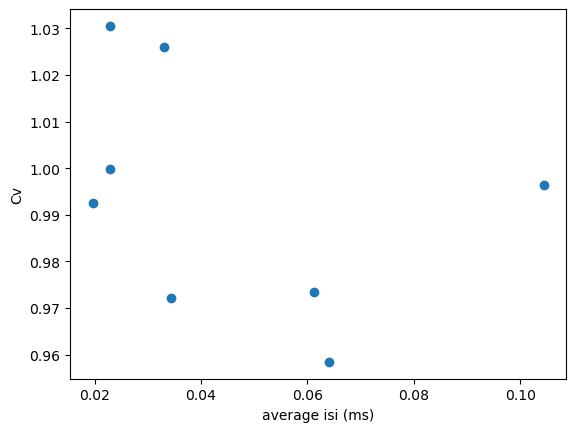

In [163]:
mean_ISI = np.zeros((8))
std_dv_ISI = np.zeros((8))

for idx, val in enumerate(s_vals):
    sum_ISI = []
    count = 0
    for epoch in np.arange(0, 100, 1):
        for ind_val in ISI_values[val][epoch]:
            sum_ISI.append(ind_val)

    mean_ISI[idx] = np.mean(sum_ISI)
    std_dv_ISI[idx] = np.std(sum_ISI)

C_V = (mean_ISI/std_dv_ISI)
# len(ISI_values[0][0])

plt.scatter(mean_ISI, C_V)
plt.xlabel('average isi (ms)')
plt.ylabel('Cv')


Do the $C_V$ values lie near unity, as would be expected of a Poisson process?

*Answer:*

## Question 2: Inhomogeneous Poisson Process
In this problem, we will use the same simulated neuron as in Problem 1, but now the reaching angle $s$ will be time-dependent with the following form:

$$s(t) = t * \pi$$

where $t$ ranges between 0 and 1 second.

### Question 2(a): Spike Trains
Generate 100 spike trains, each 1 second in duration, according to an inhomogeneous Poisson process with a firing rate profile defined by our time-dependent $s(t)$ and angle-dependent firing rate $\lambda(s)$ above. Plot 5 of the generated spike trains.

In [107]:
s_2_vals = np.zeros((len(np.arange(0, 8, 1))))
fr_2_vals = np.zeros((len(np.arange(0, 8, 1))))

for idx, k in enumerate(np.arange(0, 8, 1)):
    t = 0.1 * k
    s_2 = np.around((t * np.pi), 3)
    s_2_vals[idx] = s_2
    fr_2 = r_0 + (r_max - r_0)*np.cos(s_2 - s_max)
    fr_2_vals[idx] = np.around(fr_2, 3)

print(fr_2_vals)
print(s_2_vals)

[10.    10.978 13.816 18.237 23.827 30.004 36.181 41.754]
[0.    0.314 0.628 0.942 1.257 1.571 1.885 2.199]


In [120]:
fr_2_values = {}

for sval in s_2_vals: 
    fr_2_values[sval] = []

ISI_2_vals = {}

for sval in s_2_vals:
    ISI_2_vals[sval] = []

for epoch in np.arange(0, 100):
    for idx, sval in enumerate(s_2_vals):
        val = fr_2_vals[idx]
        fr_2_values[sval].append(generate_spike_train(val, 1)[0])
        ISI_2_vals[sval].append(generate_spike_train(val, 1)[1])

In [124]:
def generate_event_plot_2(ax, idx_val, train_start, train_end):
    val = s_2_vals[idx_val]
    events = fr_2_values[val][train_start:train_end]
    ax.eventplot(events, linewidths = 0.5, color = 'k')
    ax.set_ylim(0.5)

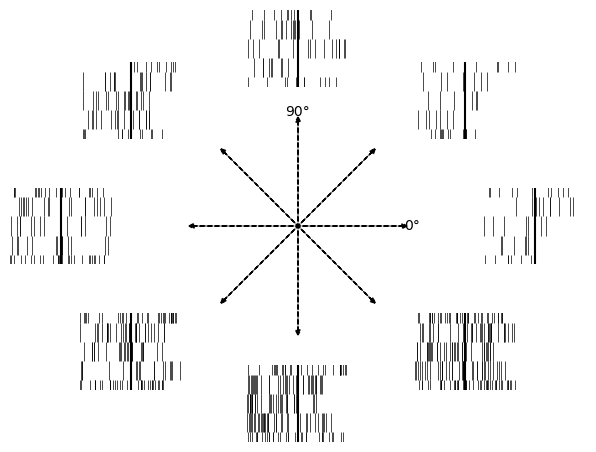

In [125]:
N = 8
t = np.linspace(0, 2*np.pi, N, endpoint=False)
r = 0.37
h = 0.9 - 2 * r
w = 0.9 - 2 * r
X, Y = r*np.cos(t)-w/2.+0.5, r*np.sin(t)-h/2.+0.5
x_ticks = np.arange(0, 1, 0.2)

fig = plt.figure()
axes = []
for x, y in zip(X, Y):
    axes.append(fig.add_axes([x, y, w, h]))

for idx in np.arange(0, 8, 1):
    generate_event_plot_2(axes[idx], idx, 0, 5)

for ax in axes:  
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_ylim(0, 4)
    ax.set_xlim(0, 1)
    ax.axvline(x=0.50, color = 'k')
    
inner_width = 0.5 
inner_height = 0.5
inner_x = 0.25 
inner_y = 0.25


inner_axes = fig.add_axes([inner_x, inner_y, inner_width, inner_height])


divisions = 8

for i in range(divisions):
    angle = i * 2 * np.pi / divisions
    dx = np.cos(angle)
    dy = np.sin(angle)
    inner_axes.arrow(0, 0, dx, dy, head_width=0.05, head_length=0.05, linestyle='--', color='k')

inner_axes.text(1.1, 0, '0°', ha='center', va='center')
inner_axes.text(0, 1.1, '90°', ha='center', va='center')
inner_axes.set_aspect('equal', adjustable='box')
inner_axes.set_axis_off()

plt.show()

### Question 2(b): Spike Histogram
Plot the spike histogram by taking spike counts in non-overlapping 20 ms bins, then averaging across the 100 trials. The spike histogram should have firing rate (in spikes / second) as the vertical axis and time (in ms, not time bin index) as the horizontal axis. Plot the expected firing rate profile on the same plot.

In [131]:
def spike_histogram_2(ax, idx_val, train_start, train_end):
    val = s_2_vals[idx_val]
    sum = np.zeros((5))
    for trial in (fr_2_values[val][train_start:train_end]):
        for val in trial: 
            if val < 0.2: 
                sum[0] += 1
            if 0.2 < val < 0.4:
                sum[1] += 1
            if 0.4 < val < 0.6: 
                sum[2] += 1
            if 0.6 < val < 0.8:
                sum[3] += 1
            if 0.8 < val: 
                sum[4] += 1
    x = np.arange(0, 1, 0.2)
    y = sum/ 100
    ax.bar(x, y, width = 0.15, color = 'k')
    ax.set_ylim(0, 15)
    return y

In [132]:
# true_fr_2_profile = np.zeros((len(s_2_vals)))

fr_2_vals



array([10.   , 10.978, 13.816, 18.237, 23.827, 30.004, 36.181, 41.754])

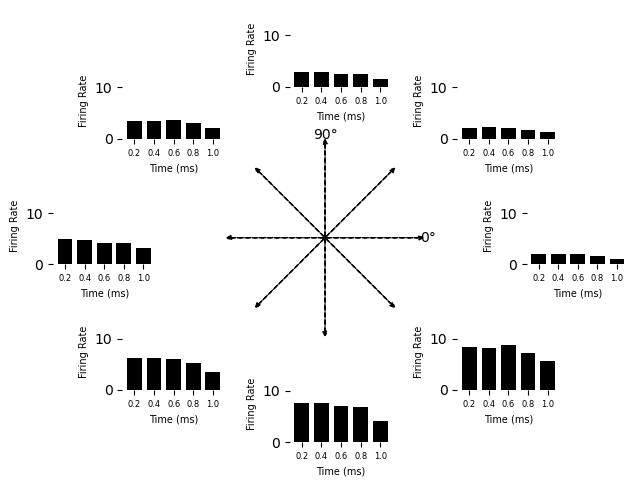

In [130]:
N = 8
t = np.linspace(0, 2*np.pi, N, endpoint=False)
r = 0.37
h = 0.9 - 2 * r
w = 0.9 - 2 * r
X, Y = r*np.cos(t)-w/2.+0.5, r*np.sin(t)-h/2.+0.5
x_ticks = np.arange(0, 1, 0.2)

fig = plt.figure()
axes = []
for x, y in zip(X, Y):
    axes.append(fig.add_axes([x, y, w, h]))

for idx in np.arange(0, 8, 1):
    spike_histogram_2(axes[idx], idx, 0, 100)

for ax in axes:  
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xlabel('Time (ms)', fontsize = 7)
    ax.set_ylabel('Firing Rate', fontsize = 7)

    x_tick_positions = [0, 0.2 , 0.4, 0.6, 0.8]
    x_tick_labels = ['0.2', '0.4', '0.6', '0.8', '1.0'] 
    label_sizes = 6  

    ax.set_xticks(x_tick_positions)
    ax.set_xticklabels(x_tick_labels, fontsize=label_sizes)

inner_width = 0.45 
inner_height = 0.45
inner_x = 0.25
inner_y = 0.25

inner_axes = fig.add_axes([inner_x, inner_y, inner_width, inner_height])

divisions = 8

for i in range(divisions):
    angle = i * 2 * np.pi / divisions
    dx = np.cos(angle)
    dy = np.sin(angle)
    inner_axes.arrow(0, 0, dx, dy, head_width=0.05, head_length=0.05, linestyle='--', color='k')

inner_axes.text(1.1, 0, '0°', ha='center', va='center')
inner_axes.text(0, 1.1, '90°', ha='center', va='center')
inner_axes.set_aspect('equal', adjustable='box')
inner_axes.set_axis_off()

plt.show()

##### Does the spike histogram agree with the expected firing rate profile?

*Answer:*

### Question 2(c): Count Distribution
For each trial, count the number of spikes across the entire trial. Plot the normalized distribution of spike counts. Fit a Poisson distribution to this empirical distribution and plot it on top of the empirical distribution.

Should we expect the spike counts to be Poisson-distributed?

*Answer:*

### Question 2(d): ISI distribution
Plot the normalized distribution of ISIs. Fit an exponential distribution to the
empirical distribution and plot it on top of the empirical distribution.

Should we expect the ISIs to be exponentially-distributed? You may need to use more trials (try 500) or histogram bins to determine the answer.

*Answer:*

## Question 3: Real Neural Data
We will analyze real neural data recorded using a 100-electrode array in the premotor cortex of a macaque monkey. The neural data has been generously provided by the laboratory of Dr. Krishna Shenoy at Stanford university exclusively for educational purposes in this course. The dataset is stored in  file `ps1_data.npy`. You can load the file numpy's `load` function as follows: `np.load('pa1_data.npy', allow_pickle=True)`. 

The .npy file contains a numpy array of dimensions (182 trials) $\times$ (8 reaching angles). The array contains spike trains recorded from a single neuron while the monkey reached 182 times along each of the 8 different reaching angles (where the trials of different reaching angles were interleaved). If the array is named `trials`, then the spike train for the $n$th trial of the $k$th reaching angle can be accessed by `trials[n, k]`, where $n=1,\dots,182$ and $k=1,\dots,8$. The indices $k=1,\dots,8$ correspond to reaching angles $\frac{30}{180}\pi$, $\frac{70}{180}\pi$ , $\frac{110}{180}\pi$ , $\frac{150}{180}\pi$ , $\frac{190}{180}\pi$ , $\frac{230}{180}\pi$ , $\frac{310}{180}\pi$ , $\frac{350}{180}\pi$, respectively. The reaching angles are not evenly spaced around the circle due to experimental constraints that are beyond the scope of this problem set.

A spike train is represented as a sequence of zeros and ones, where time is discretized in 1 ms steps. A zero indicates that the neuron did not spike in the 1 ms bin, whereas a one indicates that the neuron spiked once in the 1 ms bin. Due to the refractory period, it is not possible for a neuron to spike more than once within a 1 ms bin. Each spike train is 500 ms long and is, thus, represented by a $1 \times 500$ vector.

### Question 3(a): Spike Trains
Plot 5 spike trains for each reaching angle in the same format as shown in Figure 1.6(A) in TN.

### Question 3(b): Spike Histogram
For each reaching angle, find the spike histogram by taking spike counts in non-overlapping 20 ms bins, then averaging across the 182 trials. The spike histograms should have firing rate (in spikes / second) as the vertical axis and time (in ms, not time bin index) as the horizontal axis. Plot the 8 resulting spike histograms around a circle, as in part (a).

### Question 3(c): Tuning Curve
For each trial, count the number of spikes across the entire trial. Plots these points on the axes as shown in Figure 1.6(B) in TN. There should be 182 * 8 points in the plot (but some points may be on top of each other due to the discrete nature of spike counts). For each reaching angle, find the mean firing rate across the 182 trials, and plot the mean firing rate using a red point on the same plot. Then, fit the cosine tuning curve to the 8 red points by minimizing the sum of squared errors

$$\sum_{t=1}^8 \big( \lambda(s_t) - r_0 - (r_{max} - r_0) \cos(s_t - s_{\max}) \big)^2$$

with respect to the parameters $r_0$, $r_{max}$, and $s_{max}$. (Hint: this can be done using linear regression and the trig identity $\cos(\alpha - \beta) = \cos\alpha\cos\beta + \sin\alpha\sin\beta$.) Plot the resulting tuning curve of this neuron in green on the same plot.

In [ ]:
def get_tuning_curve_parameters(lambdas, s):
    """
    Helper function to solve for tuning curve parameters given mean firing rates and reaching angles.
    
    Returns calculated r_0, s_max, and r_max.
    """
    # Your code goes here

    r_0 = NotImplemented
    s_max = NotImplemented
    r_max = NotImplemented
    
    return r_0, s_max, r_max

In [ ]:
# Additional code to calculate mean firing rates and plot tuning curve.
# Your code goes here

In [ ]:
# We've provided this cell to help you check your code. The differences between the 
# expected parameters and your output parameters should be 0 (or close to 0).
# Please do NOT modify.

test_lambdas = [2, 4.5, 6, 5, 3, 2, 1.5, 2]
test_s = np.pi * np.array([0, 45/180, 90/180, 135/180, 1, 225/180, 270/180, 315/180])
expected_r_0, expected_s_max, expected_r_max = 3.25, -1.410828042467362, 1.1256046088074747

output_r_0, output_s_max, output_r_max = get_tuning_curve_parameters(test_lambdas, test_s)

print(f"r_0 difference: {expected_r_0 - output_r_0}")
print(f"s_max difference: {expected_s_max - output_s_max}")
print(f"r_max difference: {expected_r_max - output_r_max}")

### Question 3(d): Count Distribution
For each reaching angle, plot the normalized distribution of spike counts (using the same counts from part (c)). Plot the 8 distributions around a circle, as in part (a). Fit a Poisson distribution to each empirical distribution and plot it on top of the corresponding empirical distribution.

Why might the empirical distributions differ from the idealized Poisson distributions?

*Answer:*

### Question 3(e): Fano Factor
For each reaching angle, find the mean and variance of the spike counts across the 182 trials (using the same spike counts from part (c)). Plot the obtained mean and variance on the axes as shown in Figure 1.14(A) in TN. There should be 8 points in this plot - one per reaching angle.

Do these points lie near the 45 deg diagonal, as would be expected of a Poisson distribution?

*Answer:*

### Question 3(f): Interspike Interval (ISI) distribution
For each reaching angle, plot the normalized distribution of ISIs. Plot the 8 distributions around a circle, as in part (a). Fit an exponential distribution to each empirical distribution and plot it on top of the corresponding empirical distribution.

Why might the empirical distributions differ from the idealized exponential distributions?

*Answer:*